### Objective

This project is meant to be a demonstration on different types of analysis that can be done with Football Statistics from Transfermarkt. This project will include problem statement, data loading, data cleaning, data analysis, and conclusio

### Background
A football club is facing financial difficulties, characterized by significant debt. To recover their financial standing, the head appointed a Data Analyst. Therefore, the Data Analyst need to identify the factors that can enhance the player's market value and increase the club's market value, thereby improving the club's financial situation

### Data Loading

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from datetime import datetime
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
import pickle

warnings.filterwarnings("ignore")
from scipy import stats

In [2]:
appearances = pd.read_csv("data/appearances.csv")
players = pd.read_csv("data/players.csv")
games = pd.read_csv("data/games.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'data/appearances.csv'

In [ ]:
players

,player_id,first_name,last_name,name,last_season,current_club_id,player_code,country_of_birth,city_of_birth,country_of_citizenship,...,foot,height_in_cm,contract_expiration_date,agent_name,image_url,url,current_club_domestic_competition_id,current_club_name,market_value_in_eur,highest_market_value_in_eur
0,10,Miroslav,Klose,Miroslav Klose,2015,398,miroslav-klose,Poland,Opole,Germany,...,right,184.0,NaN,ASBW Sport Marketing,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/miroslav-klose...,IT1,SS Lazio,1000000.0,30000000.0
1,26,Roman,Weidenfeller,Roman Weidenfeller,2017,16,roman-weidenfeller,Germany,Diez,Germany,...,left,190.0,NaN,Neubauer 13 GmbH,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/roman-weidenfe...,L1,Borussia Dortmund,750000.0,8000000.0
2,65,Dimitar,Berbatov,Dimitar Berbatov,2015,1091,dimitar-berbatov,Bulgaria,Blagoevgrad,Bulgaria,...,NaN,NaN,NaN,CSKA-AS-23 Ltd.,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/dimitar-berbat...,GR1,PAOK Thessaloniki,1000000.0,34500000.0
3,77,NaN,Lúcio,Lúcio,2012,506,lucio,Brazil,Brasília,Brazil,...,NaN,NaN,NaN,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/lucio/profil/s...,IT1,Juventus FC,200000.0,24500000.0
4,80,Tom,Starke,Tom Starke,2017,27,tom-starke,East Germany (GDR),Freital,Germany,...,right,194.0,NaN,IFM,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/tom-starke/pro...,L1,Bayern Munich,100000.0,3000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31568,1264305,Sjors-Lowis,Hermsen,Sjors-Lowis Hermsen,2023,385,sjors-lowis-hermsen,NaN,NaN,Netherlands,...,NaN,175.0,NaN,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/sjors-lowis-he...,NL1,Fortuna Sittard,NaN,NaN
31569,1266282,Yaroslav,Shevchenko,Yaroslav Shevchenko,2023,3592,yaroslav-shevchenko,Ukraine,"Kremenchuk, Poltava Oblast",Ukraine,...,right,181.0,NaN,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/yaroslav-shevc...,UKR1,Kryvbas Kryvyi Rig,NaN,NaN
31570,1268326,Tymur,Butenko,Tymur Butenko,2023,3592,tymur-butenko,Ukraine,Dnipropetrovsk,Ukraine,...,right,174.0,NaN,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/tymur-butenko/...,UKR1,Kryvbas Kryvyi Rig,NaN,NaN
31571,1268378,Adnan Efe,Durmuşoğlu,Adnan Efe Durmuşoğlu,2023,6646,adnan-efe-durmusoglu,Türkiye,Istanbul,Türkiye,...,NaN,NaN,2027-06-30 00:00:00,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/adnan-efe-durm...,TR1,Fatih Karagümrük,NaN,NaN


In [ ]:
appearances

,appearance_id,game_id,player_id,player_club_id,player_current_club_id,date,player_name,competition_id,yellow_cards,red_cards,goals,assists,minutes_played
0,2231978_38004,2231978,38004,853,235,2012-07-03,Aurélien Joachim,CLQ,0,0,2,0,90
1,2233748_79232,2233748,79232,8841,2698,2012-07-05,Ruslan Abyshov,ELQ,0,0,0,0,90
2,2234413_42792,2234413,42792,6251,465,2012-07-05,Sander Puri,ELQ,0,0,0,0,45
3,2234418_73333,2234418,73333,1274,6646,2012-07-05,Vegar Hedenstad,ELQ,0,0,0,0,90
4,2234421_122011,2234421,122011,195,3008,2012-07-05,Markus Henriksen,ELQ,0,0,0,1,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1589882,4346131_720287,4346131,720287,2741,2741,2024-06-02,Danila Kozlov,RUP,0,0,0,1,87
1589883,4346131_814269,4346131,814269,964,964,2024-06-02,Gustavo Mantuan,RUP,0,0,0,0,45
1589884,4346131_815346,4346131,815346,2741,2741,2024-06-02,Nathan Gassama,RUP,0,0,0,0,19
1589885,4346131_84483,4346131,84483,964,964,2024-06-02,Aleksandr Erokhin,RUP,1,0,0,0,26


In [ ]:
games

,game_id,competition_id,season,round,date,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_position,...,stadium,attendance,referee,url,home_club_formation,away_club_formation,home_club_name,away_club_name,aggregate,competition_type
0,2321044,L1,2013,2. Matchday,2013-08-18,16,23,2,1,1.0,...,SIGNAL IDUNA PARK,80200.0,Peter Sippel,https://www.transfermarkt.co.uk/borussia-dortm...,4-2-3-1,4-3-2-1,Borussia Dortmund,Eintracht Braunschweig,2:1,domestic_league
1,2321060,L1,2013,3. Matchday,2013-08-25,23,24,0,2,18.0,...,EINTRACHT-Stadion,23325.0,Wolfgang Stark,https://www.transfermarkt.co.uk/eintracht-brau...,4-3-2-1,4-2-3-1,Eintracht Braunschweig,Eintracht Frankfurt,0:2,domestic_league
2,2321086,L1,2013,6. Matchday,2013-09-21,4,16,1,1,15.0,...,Max-Morlock-Stadion,50000.0,Knut Kircher,https://www.transfermarkt.co.uk/1-fc-nuremberg...,4-2-3-1,4-2-3-1,1.FC Nuremberg,Borussia Dortmund,1:1,domestic_league
3,2321152,L1,2013,11. Matchday,2013-11-02,44,33,0,2,7.0,...,Olympiastadion Berlin,69277.0,Günter Perl,https://www.transfermarkt.co.uk/hertha-bsc_fc-...,4-2-3-1,4-2-3-1,Hertha BSC,FC Schalke 04,0:2,domestic_league
4,2321205,L1,2013,17. Matchday,2013-12-21,41,39,2,3,14.0,...,Volksparkstadion,50000.0,Bastian Dankert,https://www.transfermarkt.co.uk/hamburger-sv_1...,4-2-3-1,4-4-2 Diamond,Hamburger SV,1.FSV Mainz 05,2:3,domestic_league
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68493,2629035,NLP,2015,Third Round,2015-10-27,383,16866,6,0,NaN,...,Philips Stadion,31000.0,Allard Lindhout,https://www.transfermarkt.co.uk/spielbericht/i...,4-3-3 Attacking,4-4-2,PSV Eindhoven,NaN,6:0,domestic_cup
68494,3092951,CLQ,2018,Qualifying Round 2nd leg,2018-08-29,383,713,3,0,NaN,...,Philips Stadion,34200.0,Anthony Taylor,https://www.transfermarkt.co.uk/spielbericht/i...,4-3-3 Defending,4-5-1,PSV Eindhoven,NaN,3:0,international_cup
68495,4164101,CGB,2018,Second Round,2023-08-29,512,1194,6,1,NaN,...,bet365 Stadium,9410.0,Michael Salisbury,https://www.transfermarkt.co.uk/spielbericht/i...,4-2-3-1,4-2-3-1,Stoke City,NaN,6:1,other
68496,3143618,FAC,2018,Third Round Replay,2019-01-15,512,3054,2,3,NaN,...,bet365 Stadium,10261.0,Geoff Eltringham,https://www.transfermarkt.co.uk/spielbericht/i...,4-4-2 Diamond,4-2-3-1,Stoke City,NaN,2:3,domestic_cup


### Data Preparation

In [ ]:
# Merge appearances,players, and games dataframes
full_players_info = players.merge(appearances, on='player_id')
full_players_info = full_players_info.merge(games[['game_id','season']], on='game_id') # Combining games dataframe but we only took the season columns from it (those are the only information we needed)

# Since our focus mainly on market value of the players, we will sort the dataframe for players with highest market value first go get better sense of it
full_players_info = full_players_info.sort_values(by='market_value_in_eur', ascending=False)
full_players_info

,player_id,first_name,last_name,name,last_season,current_club_id,player_code,country_of_birth,city_of_birth,country_of_citizenship,...,player_current_club_id,date,player_name,competition_id,yellow_cards,red_cards,goals,assists,minutes_played,season
1523755,581678,Jude,Bellingham,Jude Bellingham,2023,418,jude-bellingham,England,Stourbridge,England,...,418,2020-11-24,Jude Bellingham,CL,0,0,0,0,90,2020
1306091,342229,Kylian,Mbappé,Kylian Mbappé,2023,583,kylian-mbappe,France,Paris,France,...,583,2024-02-14,Kylian Mbappé,CL,0,0,1,0,90,2023
1523811,581678,Jude,Bellingham,Jude Bellingham,2023,418,jude-bellingham,England,Stourbridge,England,...,418,2021-12-11,Jude Bellingham,L1,0,0,0,0,90,2021
1523812,581678,Jude,Bellingham,Jude Bellingham,2023,418,jude-bellingham,England,Stourbridge,England,...,418,2021-12-15,Jude Bellingham,L1,1,0,0,0,45,2021
1523813,581678,Jude,Bellingham,Jude Bellingham,2023,418,jude-bellingham,England,Stourbridge,England,...,418,2022-01-08,Jude Bellingham,L1,0,0,1,0,90,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1589876,1262720,Ahmet Mert,Koşar,Ahmet Mert Koşar,2023,3209,ahmet-mert-kosar,Türkiye,Istanbul,Türkiye,...,3209,2024-05-26,Ahmet Mert Koşar,TR1,0,0,0,0,1,2023
1589877,1264192,Bünyamin,Çetinkaya,Bünyamin Çetinkaya,2023,10484,bunyamin-cetinkaya,Türkiye,Istanbul,Türkiye,...,10484,2024-05-12,Bünyamin Çetinkaya,TR1,0,0,0,0,1,2023
1589878,1264305,Sjors-Lowis,Hermsen,Sjors-Lowis Hermsen,2023,385,sjors-lowis-hermsen,NaN,NaN,Netherlands,...,385,2024-05-19,Sjors-Lowis Hermsen,NL1,0,0,0,0,1,2023
1589879,1266282,Yaroslav,Shevchenko,Yaroslav Shevchenko,2023,3592,yaroslav-shevchenko,Ukraine,"Kremenchuk, Poltava Oblast",Ukraine,...,3592,2024-05-18,Yaroslav Shevchenko,UKR1,0,0,0,0,15,2023


### Data Understanding


In [ ]:
full_players_info.shape

(1589881, 36)

In [ ]:
full_players_info.describe()

,player_id,last_season,current_club_id,height_in_cm,market_value_in_eur,highest_market_value_in_eur,game_id,player_club_id,player_current_club_id,yellow_cards,red_cards,goals,assists,minutes_played,season
count,1.589881e+06,1.589881e+06,1.589881e+06,1.573450e+06,1.589285e+06,1.589285e+06,1.589881e+06,1.589881e+06,1.589881e+06,1.589881e+06,1.589881e+06,1.589881e+06,1.589881e+06,1.589881e+06,1.589881e+06
mean,1.919867e+05,2.020753e+03,3.686821e+03,1.821243e+02,4.415744e+06,1.201025e+07,3.075807e+06,3.027653e+03,3.686821e+03,1.481369e-01,3.799655e-03,9.611160e-02,7.569812e-02,6.936882e+01,2.017586e+03
std,1.767487e+05,2.928265e+00,9.409791e+03,6.617152e+00,1.174701e+07,1.947762e+07,5.961845e+05,7.721400e+03,9.409791e+03,3.664970e-01,6.152415e-02,3.313539e-01,2.860383e-01,2.989151e+01,3.485561e+00
min,1.000000e+01,2.012000e+03,3.000000e+00,1.700000e+01,1.000000e+04,1.000000e+04,2.211607e+06,1.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.012000e+03
25%,5.635400e+04,2.019000e+03,3.360000e+02,1.780000e+02,2.500000e+05,1.500000e+06,2.578181e+06,2.890000e+02,3.360000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.600000e+01,2.015000e+03
50%,1.344020e+05,2.022000e+03,9.240000e+02,1.820000e+02,6.000000e+05,4.500000e+06,3.050270e+06,8.550000e+02,9.240000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.000000e+01,2.018000e+03
75%,2.815520e+05,2.023000e+03,2.696000e+03,1.870000e+02,3.000000e+06,1.400000e+07,3.589363e+06,2.441000e+03,2.696000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.000000e+01,2.021000e+03
max,1.268326e+06,2.023000e+03,8.367800e+04,2.070000e+02,1.800000e+08,2.000000e+08,4.352472e+06,1.016340e+05,8.367800e+04,2.000000e+00,1.000000e+00,6.000000e+00,6.000000e+00,1.350000e+02,2.023000e+03


### Data Cleaning

In [ ]:
columns_to_drop = ['highest_market_value_in_eur','country_of_birth','last_season','contract_expiration_date','player_name', 
                    'agent_name' ,'appearance_id', 'game_id', 'player_id', 'player_club_id', 'player_current_club_id', 'competition_id', 
                    'first_name', 'last_name', 'current_club_id', 'player_code', 'city_of_birth', 'sub_position', 'image_url', 'url', 'date']

# Dropping those columns because not necessary for our analysis
full_players_info = full_players_info.drop(columns=columns_to_drop)
full_players_info

,name,country_of_citizenship,date_of_birth,position,foot,height_in_cm,current_club_domestic_competition_id,current_club_name,market_value_in_eur,yellow_cards,red_cards,goals,assists,minutes_played,season
1523755,Jude Bellingham,England,2003-06-29,Midfield,right,186.0,ES1,Real Madrid,180000000.0,0,0,0,0,90,2020
1306091,Kylian Mbappé,France,1998-12-20,Attack,right,178.0,FR1,Paris Saint-Germain,180000000.0,0,0,1,0,90,2023
1523811,Jude Bellingham,England,2003-06-29,Midfield,right,186.0,ES1,Real Madrid,180000000.0,0,0,0,0,90,2021
1523812,Jude Bellingham,England,2003-06-29,Midfield,right,186.0,ES1,Real Madrid,180000000.0,1,0,0,0,45,2021
1523813,Jude Bellingham,England,2003-06-29,Midfield,right,186.0,ES1,Real Madrid,180000000.0,0,0,1,0,90,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1589876,Ahmet Mert Koşar,Türkiye,2006-11-29,Attack,right,189.0,TR1,Pendikspor,NaN,0,0,0,0,1,2023
1589877,Bünyamin Çetinkaya,Türkiye,2009-09-08,Attack,NaN,NaN,TR1,Kasimpasa,NaN,0,0,0,0,1,2023
1589878,Sjors-Lowis Hermsen,Netherlands,2006-06-12,Missing,NaN,175.0,NL1,Fortuna Sittard,NaN,0,0,0,0,1,2023
1589879,Yaroslav Shevchenko,Ukraine,2006-09-14,Midfield,right,181.0,UKR1,Kryvbas Kryvyi Rig,NaN,0,0,0,0,15,2023


In [ ]:
# Filter rows for players data on season 23/24
full_players_info_2023 = full_players_info.loc[full_players_info['season'] == 2023]

# Drop the 'season' column because we doesn't need it anymore (we already extracted the information needed)
full_players_info_2023 = full_players_info_2023.drop('season', axis=1)

In [ ]:
full_players_info_2023.head()

,name,country_of_citizenship,date_of_birth,position,foot,height_in_cm,current_club_domestic_competition_id,current_club_name,market_value_in_eur,yellow_cards,red_cards,goals,assists,minutes_played
1306091,Kylian Mbappé,France,1998-12-20,Attack,right,178.0,FR1,Paris Saint-Germain,180000000.0,0,0,1,0,90
1306096,Kylian Mbappé,France,1998-12-20,Attack,right,178.0,FR1,Paris Saint-Germain,180000000.0,0,0,0,0,17
1306095,Kylian Mbappé,France,1998-12-20,Attack,right,178.0,FR1,Paris Saint-Germain,180000000.0,0,0,2,0,90
1306094,Kylian Mbappé,France,1998-12-20,Attack,right,178.0,FR1,Paris Saint-Germain,180000000.0,0,0,0,0,45
1306093,Kylian Mbappé,France,1998-12-20,Attack,right,178.0,FR1,Paris Saint-Germain,180000000.0,0,0,0,0,65


In [ ]:
# Group by player name and sum the relevant columns for analysis
player_stats_2023 = full_players_info_2023.groupby('name').agg({
    'yellow_cards': 'sum', # Count the total yellow_cards that player received in season 23/24
    'red_cards': 'sum', # Count the total red_cards that player received in season 23/24
    'goals': 'sum', # Do the same process as above
    'assists': 'sum', # Do the same process as above
    'minutes_played': 'sum' # Do the same process as above
})

# Reset the index to make 'name' a regular column
player_stats_2023 = player_stats_2023.reset_index()

# Display player_stats_2023 dataframe
player_stats_2023

,name,yellow_cards,red_cards,goals,assists,minutes_played
0,Aaron Appindangoyé,1,0,1,2,2688
1,Aaron Brown,0,0,0,0,1
2,Aaron Cresswell,3,0,1,0,928
3,Aaron Donnelly,2,0,0,2,1356
4,Aaron Hickey,5,0,0,0,720
...,...,...,...,...,...,...
7079,İsmail Çokçalış,0,0,0,1,1077
7080,İzzet Topatar,1,0,0,0,39
7081,İzzet Çelik,0,0,0,0,44
7082,Şamil Öztürk,0,0,0,0,1


In [ ]:
# Drop the original columns from the central DataFrame because we have the total stats now
full_players_info_2023.drop(columns=['yellow_cards', 'red_cards', 'goals', 'assists', 'minutes_played'], inplace=True)

# Merge between player total stats 
full_players_info_2023 = full_players_info_2023.merge(player_stats_2023, how='left', on='name')

In [ ]:
# Print how many duplicate values we have
print("Number of duplicate values :",full_players_info_2023.duplicated().sum())

Number of duplicate values : 135480


In [ ]:
# Drop the duplicates columns again because we merged between dataframes
full_players_info_2023 = full_players_info_2023.drop_duplicates()

In [ ]:
# Show the current dataframe after dropping the duplicates
full_players_info_2023

,name,country_of_citizenship,date_of_birth,position,foot,height_in_cm,current_club_domestic_competition_id,current_club_name,market_value_in_eur,yellow_cards,red_cards,goals,assists,minutes_played
0,Kylian Mbappé,France,1998-12-20,Attack,right,178.0,FR1,Paris Saint-Germain,180000000.0,5,0,36,7,3329
42,Vinicius Junior,Brazil,2000-07-12,Attack,right,176.0,ES1,Real Madrid,180000000.0,11,0,24,11,3084
45,Erling Haaland,Norway,2000-07-21,Attack,left,195.0,GB1,Manchester City,180000000.0,1,0,38,6,3745
89,Jude Bellingham,England,2003-06-29,Midfield,right,186.0,ES1,Real Madrid,180000000.0,9,1,23,13,3644
168,Phil Foden,England,2000-05-28,Attack,left,171.0,GB1,Manchester City,150000000.0,3,0,27,12,4259
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142609,Ahmet Mert Koşar,Türkiye,2006-11-29,Attack,right,189.0,TR1,Pendikspor,NaN,0,0,0,0,1
142610,Bünyamin Çetinkaya,Türkiye,2009-09-08,Attack,NaN,NaN,TR1,Kasimpasa,NaN,0,0,0,0,1
142611,Sjors-Lowis Hermsen,Netherlands,2006-06-12,Missing,NaN,175.0,NL1,Fortuna Sittard,NaN,0,0,0,0,1
142612,Yaroslav Shevchenko,Ukraine,2006-09-14,Midfield,right,181.0,UKR1,Kryvbas Kryvyi Rig,NaN,0,0,0,0,15


In [ ]:
# Print how many null values we have
full_players_info_2023.isnull().sum()

name                                      0
country_of_citizenship                    1
date_of_birth                             1
position                                  0
foot                                    220
height_in_cm                            245
current_club_domestic_competition_id      0
current_club_name                         0
market_value_in_eur                     148
yellow_cards                              0
red_cards                                 0
goals                                     0
assists                                   0
minutes_played                            0
dtype: int64

In [ ]:
# Drop the null values
full_players_info_2023 = full_players_info_2023.dropna()

# Drop certain missing values (turns out position also has missing values from raw data with the value "Missing")
full_players_info_2023 = full_players_info_2023.loc[full_players_info_2023["position"] != "Missing"]

In [ ]:
# Reset the dataframe index to make it more managable
full_players_info_2023 = full_players_info_2023.reset_index()
full_players_info_2023 = full_players_info_2023.drop(columns='index')

# Display the dataframe
full_players_info_2023.head(10)

,name,country_of_citizenship,date_of_birth,position,foot,height_in_cm,current_club_domestic_competition_id,current_club_name,market_value_in_eur,yellow_cards,red_cards,goals,assists,minutes_played
0,Kylian Mbappé,France,1998-12-20,Attack,right,178.0,FR1,Paris Saint-Germain,180000000.0,5,0,36,7,3329
1,Vinicius Junior,Brazil,2000-07-12,Attack,right,176.0,ES1,Real Madrid,180000000.0,11,0,24,11,3084
2,Erling Haaland,Norway,2000-07-21,Attack,left,195.0,GB1,Manchester City,180000000.0,1,0,38,6,3745
3,Jude Bellingham,England,2003-06-29,Midfield,right,186.0,ES1,Real Madrid,180000000.0,9,1,23,13,3644
4,Phil Foden,England,2000-05-28,Attack,left,171.0,GB1,Manchester City,150000000.0,3,0,27,12,4259
5,Bukayo Saka,England,2001-09-05,Attack,left,178.0,GB1,Arsenal FC,140000000.0,4,0,20,14,3841
6,Jamal Musiala,Germany,2003-02-26,Midfield,right,184.0,L1,Bayern Munich,130000000.0,3,0,12,8,2860
7,Florian Wirtz,Germany,2003-05-03,Midfield,right,177.0,L1,Bayer 04 Leverkusen,130000000.0,7,0,18,20,3475
8,Rodri,Spain,1996-06-22,Midfield,right,191.0,GB1,Manchester City,130000000.0,10,1,9,14,4327
9,Federico Valverde,Uruguay,1998-07-22,Midfield,right,182.0,ES1,Real Madrid,120000000.0,2,0,3,8,4280


In [ ]:
# Transform date_of_birth into datetime format
full_players_info_2023['date_of_birth'] = pd.to_datetime(full_players_info_2023['date_of_birth'])
# Get the current datetime
now = datetime.now()

# Calculate age in years
full_players_info_2023['age'] = (now - full_players_info_2023['date_of_birth']).dt.days / 365.25
full_players_info_2023['age'] = full_players_info_2023['age'].round().astype(int)

# Drop the 'date_of_birth' column because we already transformed it into age
full_players_info_2023 = full_players_info_2023.drop(columns=['date_of_birth'])

In [ ]:
full_players_info_2023.head(10)

,name,country_of_citizenship,position,foot,height_in_cm,current_club_domestic_competition_id,current_club_name,market_value_in_eur,yellow_cards,red_cards,goals,assists,minutes_played,age
0,Kylian Mbappé,France,Attack,right,178.0,FR1,Paris Saint-Germain,180000000.0,5,0,36,7,3329,26
1,Vinicius Junior,Brazil,Attack,right,176.0,ES1,Real Madrid,180000000.0,11,0,24,11,3084,24
2,Erling Haaland,Norway,Attack,left,195.0,GB1,Manchester City,180000000.0,1,0,38,6,3745,24
3,Jude Bellingham,England,Midfield,right,186.0,ES1,Real Madrid,180000000.0,9,1,23,13,3644,21
4,Phil Foden,England,Attack,left,171.0,GB1,Manchester City,150000000.0,3,0,27,12,4259,24
5,Bukayo Saka,England,Attack,left,178.0,GB1,Arsenal FC,140000000.0,4,0,20,14,3841,23
6,Jamal Musiala,Germany,Midfield,right,184.0,L1,Bayern Munich,130000000.0,3,0,12,8,2860,21
7,Florian Wirtz,Germany,Midfield,right,177.0,L1,Bayer 04 Leverkusen,130000000.0,7,0,18,20,3475,21
8,Rodri,Spain,Midfield,right,191.0,GB1,Manchester City,130000000.0,10,1,9,14,4327,28
9,Federico Valverde,Uruguay,Midfield,right,182.0,ES1,Real Madrid,120000000.0,2,0,3,8,4280,26


In [ ]:
# Saving final dataframe to csv
full_players_info_2023.to_csv('full_players_info_2023.csv',index=False)

### Data Analysis

Who are the players with the highest market value right now?

Player market values fluctuate constantly based on performance, age, potential, and other factors. But who are the current kings of the transfer market? Therefore, we can identify the players whose exceptional talent has placed them at the top of football's financial hierarchy.

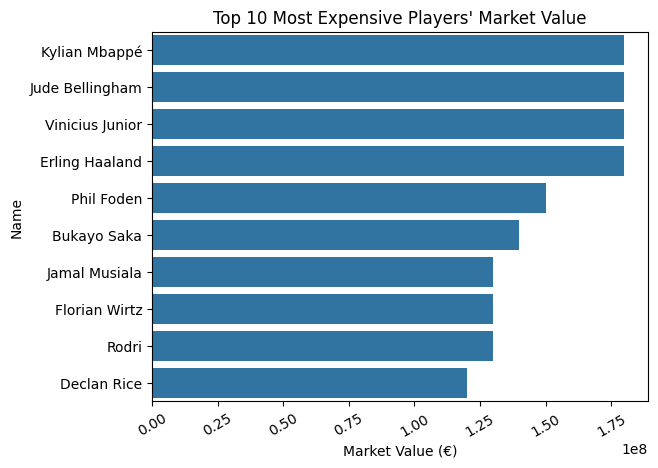

In [ ]:
# Filter the DataFrame, sort it by 'market_value_in_eur', and select the top 10 players
sns.barplot(data=full_players_info_2023.sort_values(by='market_value_in_eur', ascending=False).head(10), x='market_value_in_eur', y='name', edgecolor="none")

# Set the label and titles
plt.xlabel('Market Value (€)')
plt.xticks(rotation=30)
plt.ylabel('Name')
plt.title("Top 10 Most Expensive Players' Market Value")

# Show the plot
plt.show()

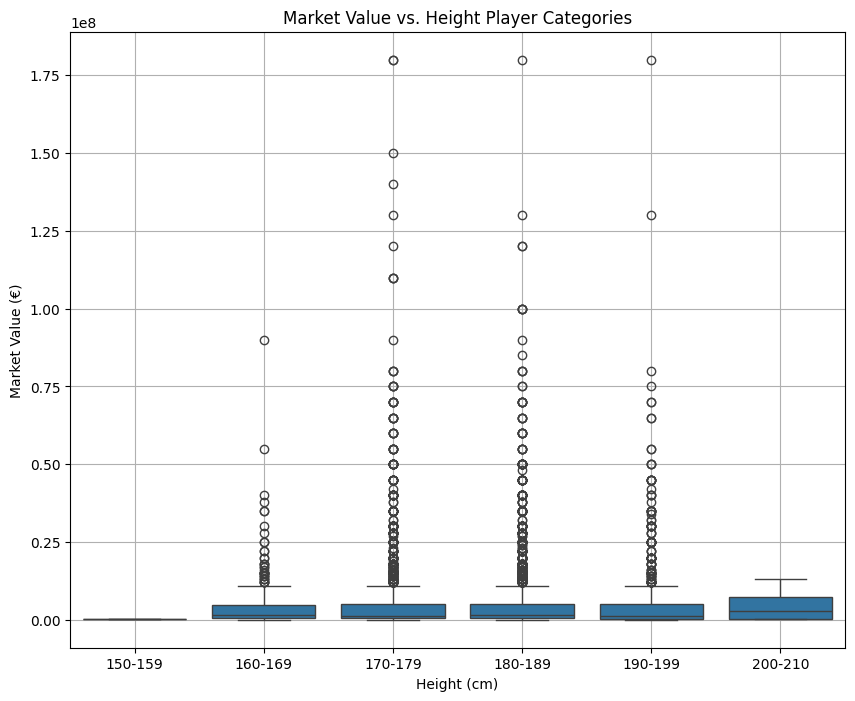

In [ ]:
# Create a temporary copy of the DataFrame to avoid modifying the original
df_copy = full_players_info_2023.copy()

# Define height bins and labels
bins_height = [150, 160, 170, 180, 190, 200, 210]
labels_height = ['150-159', '160-169', '170-179', '180-189', '190-199','200-210']

# Create height categories in the copy of the DataFrame
df_copy['height_category'] = pd.cut(df_copy['height_in_cm'], bins=bins_height, labels=labels_height)

# Box plot for market value vs. height categories
plt.figure(figsize=(10, 8))
sns.boxplot(x='height_category', y='market_value_in_eur', data=df_copy)
plt.xlabel('Height (cm)')
plt.ylabel('Market Value (€)')
plt.title('Market Value vs. Height Player Categories')
plt.grid(True)
plt.show()

In [ ]:
# Get medians for each height category
medians = df_copy.groupby('height_category')['market_value_in_eur'].median()

# Print the medians with labels
for category, median in zip(labels_height, medians):
  print(f"Median Market Value for {category} cm: {median:.2f} Million €")

Median Market Value for 150-159 cm: 250000.00 Million €
Median Market Value for 160-169 cm: 1500000.00 Million €
Median Market Value for 170-179 cm: 1200000.00 Million €
Median Market Value for 180-189 cm: 1500000.00 Million €
Median Market Value for 190-199 cm: 1200000.00 Million €
Median Market Value for 200-210 cm: 2750000.00 Million €


In [ ]:
df_copy.groupby('height_category')['market_value_in_eur'].describe()

,count,mean,std,min,25%,50%,75%,max
height_category,,,,,,,,
150-159,1.0,2.500000e+05,NaN,250000.0,250000.0,250000.0,250000.0,250000.0
160-169,290.0,4.624138e+06,8.833629e+06,50000.0,500000.0,1500000.0,4875000.0,90000000.0
170-179,2382.0,5.779211e+06,1.338796e+07,10000.0,450000.0,1200000.0,5000000.0,180000000.0
180-189,3220.0,5.592795e+06,1.171912e+07,25000.0,450000.0,1500000.0,5000000.0,180000000.0
190-199,787.0,5.780432e+06,1.310746e+07,25000.0,400000.0,1200000.0,5000000.0,180000000.0
200-210,12.0,4.412500e+06,4.652755e+06,100000.0,356250.0,2750000.0,7250000.0,13000000.0


From the box plot and descriptive statistics above, we can see that :

There is no clear correlation between player height and median market value.
Both tall and short players can have high or low market values, indicating that individual performance and other factors maybe are more influential.
The presence of outliers suggests that maybe exceptional individual qualities, unrelated to height, significantly impact market value.
Player performance metrics, such as goals, assists, or overall skill, likely play a more critical role in determining market value.

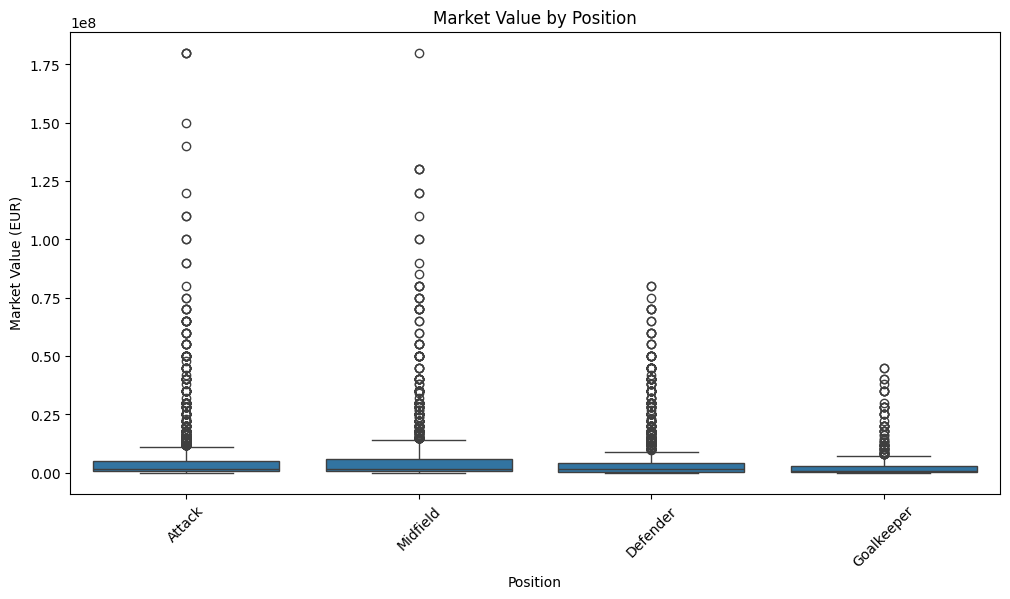

In [ ]:
# Box plot: Market Value by Position
plt.figure(figsize=(12, 6))
sns.boxplot(x='position', y='market_value_in_eur', data=full_players_info_2023)
plt.title('Market Value by Position')
plt.xlabel('Position')
plt.ylabel('Market Value (EUR)')
plt.xticks(rotation=45)
plt.show()

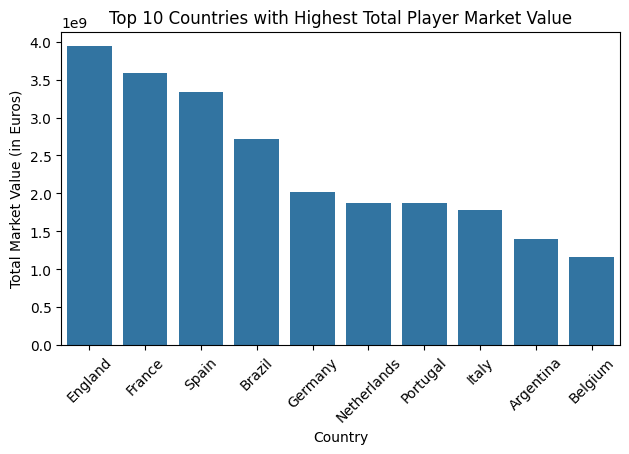

In [ ]:
# Group by country and calculate the sum of market values
country_market_value = full_players_info_2023.groupby('country_of_citizenship')['market_value_in_eur'].sum().sort_values(ascending=False)

# Select top 10 countries
top_10_countries = country_market_value.head(10)

# Create a bar chart with seaborn
sns.barplot(x=top_10_countries.index, y=top_10_countries.values)

# Customize the plot with labels and title
plt.xlabel('Country')
plt.ylabel('Total Market Value (in Euros)')
plt.xticks(rotation=45)
plt.title('Top 10 Countries with Highest Total Player Market Value')
plt.tight_layout()  # Adjust spacing between elements for better readability

# Show the plot
plt.show()

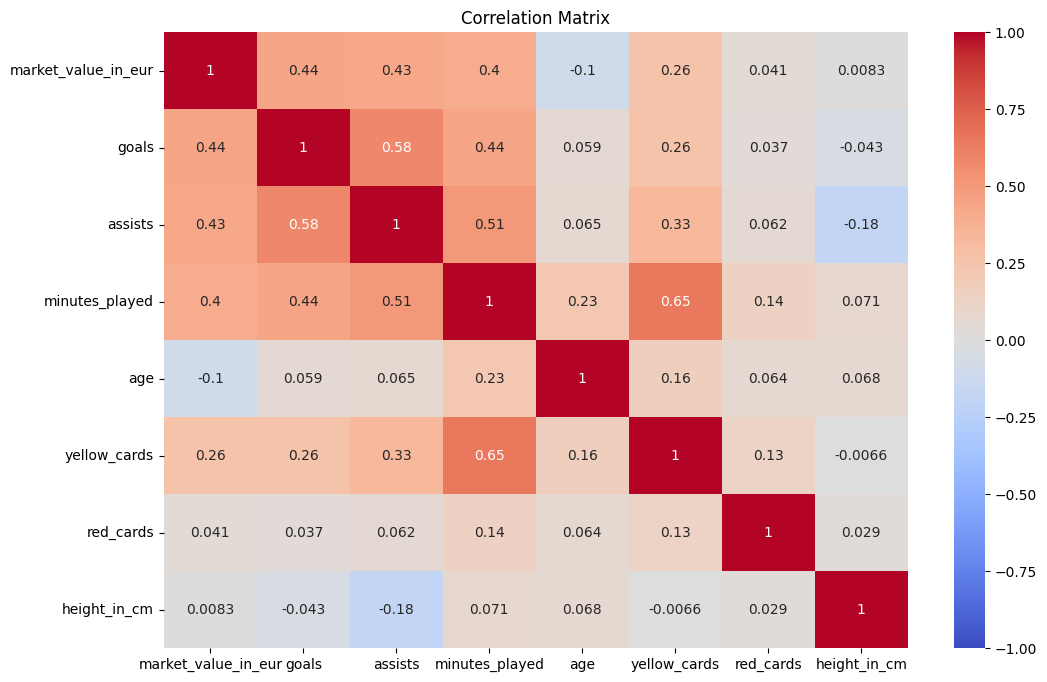

In [ ]:
plt.figure(figsize=(12, 8))
corr_matrix = full_players_info_2023[['market_value_in_eur', 'goals', 'assists', 'minutes_played', 'age', 'yellow_cards', 'red_cards', 'height_in_cm']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

Market Value Correlations:

Goals (0.45) and Assists (0.43): Players who score more goals and provide more assists generally have higher market values.

Minutes Played (0.41): More playing time is linked to a higher market value, likely due to increased exposure and consistency.

Age (-0.1): Older players tend to have slightly lower market values, possibly due to declining physical ability or future potential.

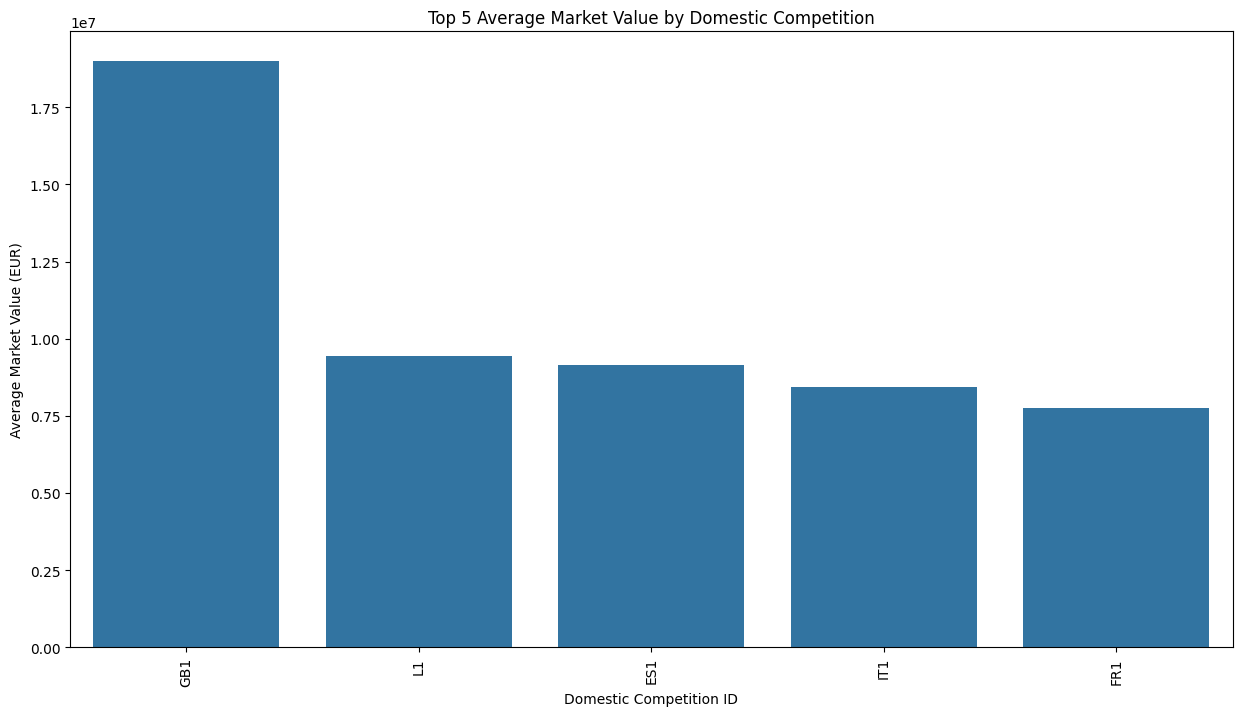

In [ ]:
# Bar plot: Market Value by League
plt.figure(figsize=(15, 8))
avg_market_value_by_competition = full_players_info_2023.groupby('current_club_domestic_competition_id')['market_value_in_eur'].mean().sort_values(ascending=False).head(5)
sns.barplot(x=avg_market_value_by_competition.index, y=avg_market_value_by_competition.values)
plt.title('Top 5 Average Market Value by Domestic Competition')
plt.xlabel('Domestic Competition ID')
plt.ylabel('Average Market Value (EUR)')
plt.xticks(rotation=90)
plt.show()

Which club has the highest market value right now?

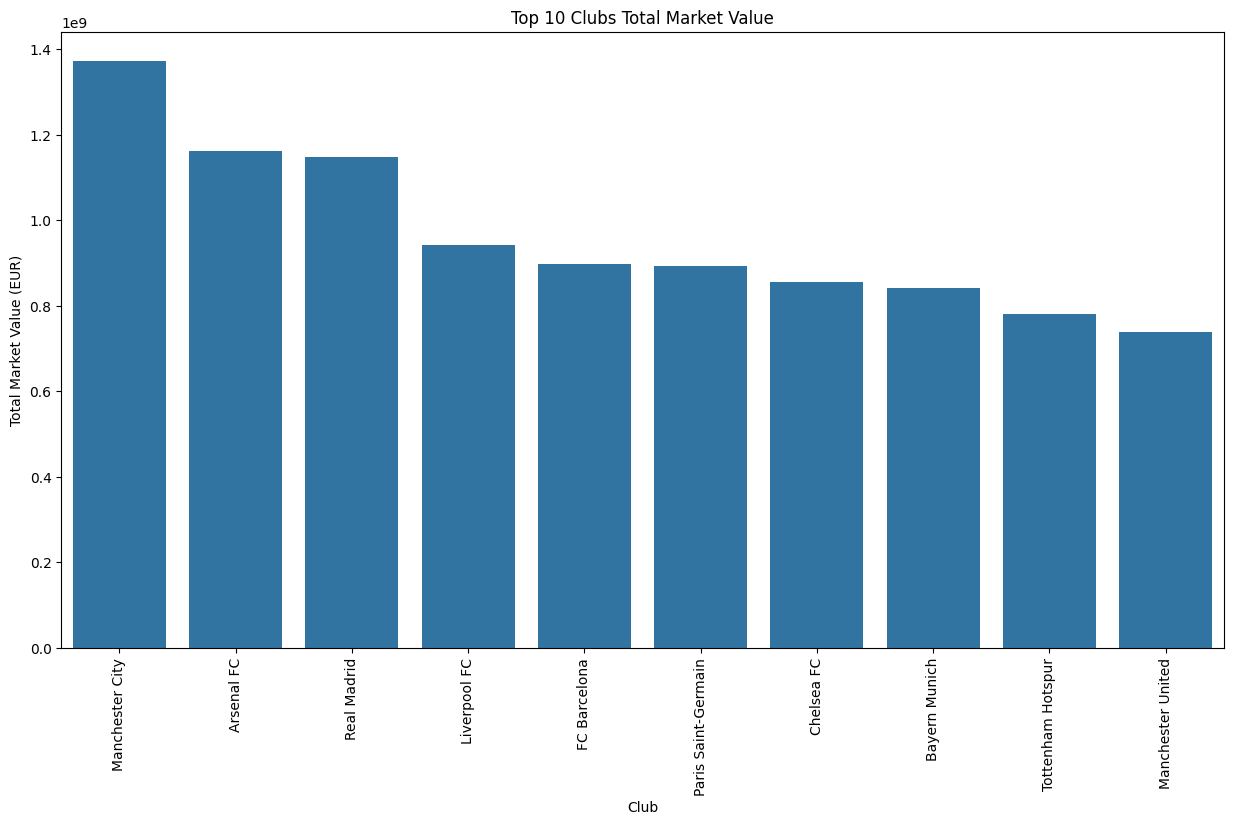

In [ ]:
plt.figure(figsize=(15, 8))
club_value = full_players_info_2023.groupby('current_club_name')['market_value_in_eur'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=club_value.index, y=club_value.values)
plt.title('Top 10 Clubs Total Market Value')
plt.xlabel('Club')
plt.ylabel('Total Market Value (EUR)')
plt.xticks(rotation=90)
plt.show()

In [ ]:
full_players_info_2023 = full_players_info_2023.drop(columns=['name','red_cards','height_in_cm'])

In [ ]:
full_players_info_2023 = pd.get_dummies(full_players_info_2023, columns=['country_of_citizenship', 'position', 'foot', 'current_club_domestic_competition_id', 'current_club_name'])

In [ ]:
X = full_players_info_2023.drop(columns=['market_value_in_eur'])
y = full_players_info_2023['market_value_in_eur']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Train and predict with RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)

# Calculate metrics for RandomForestRegressor
rf_mae = mean_absolute_error(y_test, rf_y_pred)
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_rmse = rf_mse ** 0.5
rf_r2 = r2_score(y_test, rf_y_pred)

# Print metrics for RandomForestRegressor
print("RandomForestRegressor Metrics:")
print(f"Mean Absolute Error (MAE): {rf_mae}")
print(f"Mean Squared Error (MSE): {rf_mse}")
print(f"Root Mean Squared Error (RMSE): {rf_rmse}")
print(f"R-squared (R²): {rf_r2}\n")

# Train and predict with GradientBoostingRegressor
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
gb_y_pred = gb_model.predict(X_test)

# Calculate metrics for GradientBoostingRegressor
gb_mae = mean_absolute_error(y_test, gb_y_pred)
gb_mse = mean_squared_error(y_test, gb_y_pred)
gb_rmse = gb_mse ** 0.5
gb_r2 = r2_score(y_test, gb_y_pred)

# Print metrics for GradientBoostingRegressor
print("GradientBoostingRegressor Metrics:")
print(f"Mean Absolute Error (MAE): {gb_mae}")
print(f"Mean Squared Error (MSE): {gb_mse}")
print(f"Root Mean Squared Error (RMSE): {gb_rmse}")
print(f"R-squared (R²): {gb_r2}")


RandomForestRegressor Metrics:
Mean Absolute Error (MAE): 3001342.0463032112
Mean Squared Error (MSE): 46842166072348.766
Root Mean Squared Error (RMSE): 6844133.697726014
R-squared (R²): 0.7095509008226251

GradientBoostingRegressor Metrics:
Mean Absolute Error (MAE): 3584350.472036199
Mean Squared Error (MSE): 50762507390961.91
Root Mean Squared Error (RMSE): 7124781.217059364
R-squared (R²): 0.6852424689132137


In [ ]:
# Save the RandomForestRegressor model to a pickle file
with open('rf_model.pkl', 'wb') as rf_model_file:
    pickle.dump(rf_model, rf_model_file)

# Save the GradientBoostingRegressor model to a pickle file
with open('gb_model.pkl', 'wb') as gb_model_file:
    pickle.dump(gb_model, gb_model_file)

# Save the scaler to a pickle file
with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)


In [4]:
import pandas as pd
import numpy as np
import pickle
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the data
full_players_info_2023 = pd.read_csv('full_players_info_2023.csv')

# Drop columns that are not needed for the model
columns_to_drop = ['name']  # Adjust if needed
full_players_info_2023 = full_players_info_2023.drop(columns=columns_to_drop)

# Handle missing values
full_players_info_2023 = full_players_info_2023.dropna()

# Encode categorical variables
full_players_info_2023 = pd.get_dummies(full_players_info_2023, 
                                         columns=['country_of_citizenship', 'position', 'foot', 
                                                  'current_club_domestic_competition_id', 
                                                  'current_club_name'])

# Define features and target
X = full_players_info_2023.drop(columns=['goals'])
y = full_players_info_2023['goals']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

import xgboost as xgb

# Initialize and train the model
model = xgb.XGBRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = model.predict(X_test_scaled)
print("\n\nxgboost model")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred)}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred)}")
print(f"Root Mean Squared Error (RMSE): {mean_squared_error(y_test, y_pred) ** 0.5}")
print(f"R-squared (R²): {r2_score(y_test, y_pred)}")

from sklearn.ensemble import GradientBoostingRegressor

# Initialize and train the model
model = GradientBoostingRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = model.predict(X_test_scaled)
print("\n\nGradientBoosting")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred)}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred)}")
print(f"Root Mean Squared Error (RMSE): {mean_squared_error(y_test, y_pred) ** 0.5}")
print(f"R-squared (R²): {r2_score(y_test, y_pred)}")

# Save the model
with open('goals_prediction_model_gb.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)


# Save the model
with open('goals_prediction_model_xgb.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

# Save the model, scaler, and column names
with open('goals_prediction_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

with open('scaler_goal_prediction.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

# Save the list of columns
original_columns = X_train.columns.tolist()
with open('train_columns.pkl', 'wb') as columns_file:
    pickle.dump(original_columns, columns_file)


FileNotFoundError: [Errno 2] No such file or directory: 'full_players_info_2023.csv'

In [3]:
import pandas as pd
import pickle
from datetime import datetime

# Load the trained model, scaler, and columns
with open('goals_prediction_model.pkl', 'rb') as model_file:
    model = pickle.load(model_file)

with open('scaler_goal_prediction.pkl', 'rb') as scaler_file:
    scaler = pickle.load(scaler_file)

with open('train_columns.pkl', 'rb') as columns_file:
    original_columns = pickle.load(columns_file)

def predict_goals_for_player(name=None, date_of_birth=None, yellow_cards=None, assists=None, minutes_played=None, country_of_citizenship=None, position=None, foot=None, current_club_domestic_competition_id=None, current_club_name=None):
    # Load the data
    full_players_info_2023 = pd.read_csv('full_players_info_2023.csv')

    # Filter data if name is provided
    if name:
        raw_input_data = full_players_info_2023[full_players_info_2023['name'] == name].copy()
    else:
        # Create a new entry if no name is provided
        raw_input_data = pd.DataFrame({
            'name': [name],
            'date_of_birth': [date_of_birth],
            'yellow_cards': [yellow_cards],
            'assists': [assists],
            'minutes_played': [minutes_played],
            'country_of_citizenship': [country_of_citizenship],
            'position': [position],
            'foot': [foot],
            'current_club_domestic_competition_id': [current_club_domestic_competition_id],
            'current_club_name': [current_club_name]
        })

    # Calculate age if date_of_birth is provided
    if date_of_birth:
        raw_input_data['date_of_birth'] = pd.to_datetime(raw_input_data['date_of_birth'])
        now = datetime.now()
        raw_input_data['age'] = ((now - raw_input_data['date_of_birth']).dt.days / 365.25).round().astype(int)
        raw_input_data = raw_input_data.drop(columns=['date_of_birth'])
    else:
        if 'date_of_birth' in raw_input_data.columns:
            raw_input_data = raw_input_data.drop(columns=['date_of_birth'])
        raw_input_data['age'] = None

    # Encode categorical variables
    encoded_input_data = pd.get_dummies(raw_input_data, 
                                         columns=['country_of_citizenship', 'position', 'foot', 
                                                  'current_club_domestic_competition_id', 
                                                  'current_club_name'])

    # Add missing columns with zeros
    for col in original_columns:
        if col not in encoded_input_data.columns:
            encoded_input_data[col] = 0

    # Ensure the input data has the same columns as the training data
    encoded_input_data = encoded_input_data[original_columns]

    # Scale the input features
    input_data_scaled = scaler.transform(encoded_input_data)

    # Predict the goals for the player
    predicted_goals = model.predict(input_data_scaled)

    # Display the results
    if name:
        player_info = full_players_info_2023[full_players_info_2023['name'] == name].iloc[0]
        current_club = player_info['current_club_name']
        position = player_info['position']
    else:
        current_club = current_club_name
        position = position

    print(f"Player: {name}")
    print(f"Position: {position}")
    print(f"Predicted Goals for 2024/25 Season: {round(predicted_goals[0])}")

# Example usage
predict_goals_for_player(name='Virgil van Dijk', yellow_cards=3, assists=7, minutes_played=2000, country_of_citizenship='Netherlands', position='Defender', foot='Right', current_club_domestic_competition_id='EPL', current_club_name='Liverpool')
predict_goals_for_player('Kylian Mbappé')


FileNotFoundError: [Errno 2] No such file or directory: 'goals_prediction_model.pkl'